Assignment 2 CSCN8000 Artificial Intelligence Algorithms and Mathematics

#### PRAMOD KUNJUKUNJU SAJI - 8856432

1.Consider the heart disease dataset in pandas dataframe

In [148]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [149]:
# Read the data from the CSV file
heart_disease_df = pd.read_csv('heart.csv')

# Preview the data
heart_disease_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [150]:
# Describe the dataset
heart_disease_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


2.Remove outliers using mean,median,Z score.

In [151]:
# Convert numeric columns to numerical type (except 'HeartDisease')
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Initialize a dictionary to store count of outliers
count_of_outliers= {}

# Initialize count of outliers to 0
for col in numerical_columns:
    count_of_outliers[col] = 0
   
# Method to remove outliers using mean
def remove_outliers_mean(data, threshold=3):
    for col in numerical_columns:
        count_of_outliers[col] += len(data[((data[col] - data[col].mean()).abs() > threshold * data[col].std())])
        data = data[~((data[col] - data[col].mean()).abs() > threshold * data[col].std())]
    return data

# Removing outliers using mean
df_no_outliers_mean = remove_outliers_mean(heart_disease_df)
print("Count of removed records using mean:", count_of_outliers)
print(len(df_no_outliers_mean))

# Method to remove outliers using Z-score
def remove_outliers_zscore(data, threshold=3):
    for col in numerical_columns:
        count_of_outliers[col] += len(data[np.abs(stats.zscore(data[col])) > threshold])
        data = data[~(np.abs(stats.zscore(data[col])) > threshold)]
    return data

# Removing outliers using Z-score
df_no_outliers_zscore = remove_outliers_zscore(df_no_outliers_mean)
print("Count of removed records using Z-Score:", count_of_outliers)
print(len(df_no_outliers_zscore))

Count of removed records using mean: {'Age': 0, 'RestingBP': 8, 'Cholesterol': 3, 'FastingBS': 0, 'MaxHR': 1, 'Oldpeak': 7}
899
Count of removed records using Z-Score: {'Age': 0, 'RestingBP': 10, 'Cholesterol': 3, 'FastingBS': 0, 'MaxHR': 1, 'Oldpeak': 14}
890


3.Convert text columns to numbers using label encoding and one hot encoding

In [152]:
# Get the categorical columns
categorical_columns = heart_disease_df.select_dtypes(include=['object']).columns.tolist()

# Print the categorical columns
print(categorical_columns)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [153]:
# Encoding categorical data
encoded_data = df_no_outliers_zscore.copy()
label_encoder = LabelEncoder()

for column in categorical_columns:
    encoded_data[column] = label_encoder.fit_transform(df_no_outliers_zscore[column])

# Print the encoded data
encoded_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


4.Apply scaling

In [154]:
# Set the skip columns
skip_columns = categorical_columns

# Add the target column to the skip columns
skip_columns.append('HeartDisease')

# Initializing StandardScaler object
scaler = StandardScaler()

# Copy data to avoid modifying the original data
scaled_data = encoded_data.copy()
    
# Getting columns to scale
columns_to_scale = [col for col in scaled_data.columns if col not in skip_columns]
    
# Scaling data
scaled_data_col = scaler.fit_transform(scaled_data[columns_to_scale])
    
# Adding scaled data to dataframe
scaled_data[columns_to_scale] = scaled_data_col

# Preview the scaled datas
scaled_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.420804,1,1,0.474433,0.852559,-0.552255,1,1.380094,0,-0.860949,2,0
1,-0.467332,0,2,1.653561,-0.167203,-0.552255,1,0.748525,0,0.168258,1,1
2,-1.738628,1,1,-0.115131,0.796425,-0.552255,2,-1.540914,0,-0.860949,2,0
3,-0.573273,0,0,0.356521,0.150888,-0.552255,1,-1.146183,1,0.682862,1,1
4,0.062374,1,2,1.063997,-0.026868,-0.552255,1,-0.593560,0,-0.860949,2,0


5.Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the performance

In [155]:
# Method to evaluate the models
def evaluate_models(data, models):
  # Preprocessing and Standardization
  X = data.drop(data.columns[-1], axis=1)
  X = X.drop(X.columns[0], axis=1)
  y = data[data.columns[-1]]
  
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  for model in models:
    print(f'\n {type(model).__name__}\n')

    # Train the model
    model.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = model.predict(X_test)

    # Labels for confusion matrix
    labels = ['Negative', 'Positive']

    # Evaluate the model's performance
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Print the results
    print("Cross-Validation Accuracy Scores:", scores)
    print("Mean Cross-Validation Accuracy:", scores.mean())
    print("Standard Deviation of Cross-Validation Accuracy:", scores.std())

    # Calculate the accuracy, precision, recall, f1 score, and roc auc score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the accuracy, precision, recall, f1 score, and roc auc score
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc, '\n')

    # Calculate the classification report
    cr = classification_report(y_test, y_pred, target_names=labels, zero_division=0)

    # Print the classification report
    print(cr)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the classification report
    print(f'Confusion Matrix:\n {cm}')

    # Plot the confusion matrix
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', xticklabels = labels, yticklabels = labels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()


 SVC

Cross-Validation Accuracy Scores: [0.84615385 0.88811189 0.83802817 0.84507042 0.84507042]
Mean Cross-Validation Accuracy: 0.8524869496700482
Standard Deviation of Cross-Validation Accuracy: 0.01804611053203781
Accuracy: 0.8539325842696629
Precision: 0.845360824742268
Recall: 0.8817204301075269
F1 Score: 0.8631578947368421
ROC AUC Score: 0.8526249209361163 

              precision    recall  f1-score   support

    Negative       0.86      0.82      0.84        85
    Positive       0.85      0.88      0.86        93

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178

Confusion Matrix:
 [[70 15]
 [11 82]]


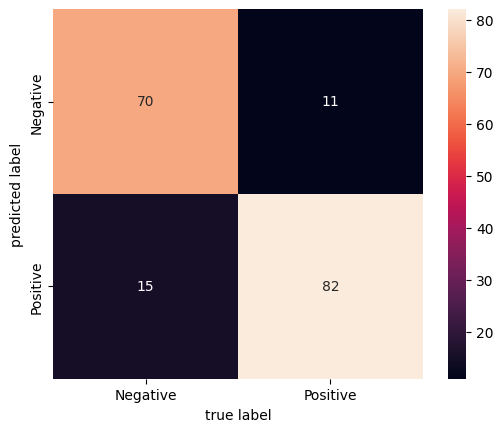


 BaggingClassifier



/Users/pramodsaji/Desktop/Applied Artificial Intelligence & Machine Learning/Machine-Learning-Programming/Lab/Untitled/CSCN8010/venv/CSCN8010_classic_ml1/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/pramodsaji/Desktop/Applied Artificial Intelligence & Machine Learning/Machine-Learning-Programming/Lab/Untitled/CSCN8010/venv/CSCN8010_classic_ml1/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/pramodsaji/Desktop/Applied Artificial Intelligence & Machine Learning/Machine-Learning-Programming/Lab/Untitled/CSCN8010/venv/CSCN8010_classic_ml1/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Use

Cross-Validation Accuracy Scores: [0.85314685 0.88811189 0.81690141 0.83802817 0.84507042]
Mean Cross-Validation Accuracy: 0.8482517482517483
Standard Deviation of Cross-Validation Accuracy: 0.023282091886204746
Accuracy: 0.8539325842696629
Precision: 0.845360824742268
Recall: 0.8817204301075269
F1 Score: 0.8631578947368421
ROC AUC Score: 0.8526249209361163 

              precision    recall  f1-score   support

    Negative       0.86      0.82      0.84        85
    Positive       0.85      0.88      0.86        93

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178

Confusion Matrix:
 [[70 15]
 [11 82]]


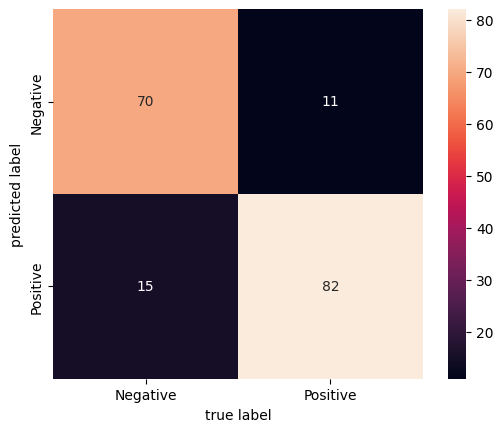

In [156]:
# Evaluating Standalone and bagging classifier model
evaluate_models(
    scaled_data,
    [
      SVC(kernel='linear'),
      BaggingClassifier(base_estimator=SVC(kernel='linear'))
    ]
)

6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance


 DecisionTreeClassifier

Cross-Validation Accuracy Scores: [0.77622378 0.7972028  0.85915493 0.77464789 0.77464789]
Mean Cross-Validation Accuracy: 0.796375455530385
Standard Deviation of Cross-Validation Accuracy: 0.03253371013296331
Accuracy: 0.797752808988764
Precision: 0.8131868131868132
Recall: 0.7956989247311828
F1 Score: 0.8043478260869565
ROC AUC Score: 0.7978494623655914 

              precision    recall  f1-score   support

    Negative       0.78      0.80      0.79        85
    Positive       0.81      0.80      0.80        93

    accuracy                           0.80       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix:
 [[68 17]
 [19 74]]


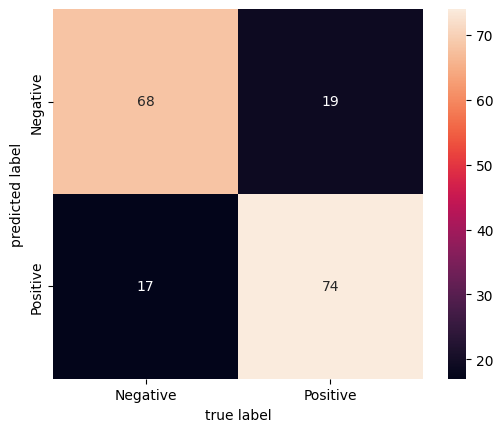


 BaggingClassifier

Cross-Validation Accuracy Scores: [0.81818182 0.88811189 0.84507042 0.79577465 0.80985915]
Mean Cross-Validation Accuracy: 0.8313995863291638
Standard Deviation of Cross-Validation Accuracy: 0.032591449046427856
Accuracy: 0.8595505617977528
Precision: 0.84
Recall: 0.9032258064516129
F1 Score: 0.8704663212435233
ROC AUC Score: 0.857495256166983 

              precision    recall  f1-score   support

    Negative       0.88      0.81      0.85        85
    Positive       0.84      0.90      0.87        93

    accuracy                           0.86       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.86      0.86      0.86       178

Confusion Matrix:
 [[69 16]
 [ 9 84]]


/Users/pramodsaji/Desktop/Applied Artificial Intelligence & Machine Learning/Machine-Learning-Programming/Lab/Untitled/CSCN8010/venv/CSCN8010_classic_ml1/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/pramodsaji/Desktop/Applied Artificial Intelligence & Machine Learning/Machine-Learning-Programming/Lab/Untitled/CSCN8010/venv/CSCN8010_classic_ml1/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/pramodsaji/Desktop/Applied Artificial Intelligence & Machine Learning/Machine-Learning-Programming/Lab/Untitled/CSCN8010/venv/CSCN8010_classic_ml1/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Use

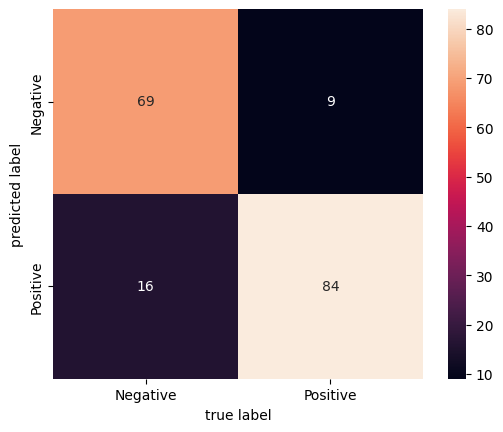

In [157]:
# Evaluating Decision Tree and Bagging Classifier
evaluate_models(
    scaled_data,
    [
        DecisionTreeClassifier(),
        BaggingClassifier(base_estimator=DecisionTreeClassifier())
    ]
)

7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

**BaggingClassifier - DecisionTree seems to be performing relatively well across several metrics. It shows good numbers in terms of accuracy, precision, recall, F1 score, and ROC AUC score.**

**Additionally, it provides a good balance between precision and recall, indicating that it's able to classify both positive and negative classes effectively.**